In [67]:
#!pip install dscribe
#!pip install ase
#!pip install scipy

In [ ]:
from pymatgen.ext.matproj import MPRester
from ase import Atoms

# Set Materials Project API key
api_key = "4HwV8OwM6Tu8Q6wzS3m4HbT2X8vOtodP"

# Get the structure for quartz SiO2 (mp-7000)
with MPRester(api_key) as mpr:
    structure = mpr.get_structure_by_material_id("mp-8883")

#  Extract symbols and positions
symbols = [str(site.specie) for site in structure.sites]
positions = [site.coords for site in structure.sites]

#Convert to ASE Atoms object (optional)
ase_atoms = Atoms(symbols=symbols, positions=positions)

# Print each element and its position
print("Element positions (each in a row):")
for symbol, pos in zip(symbols, positions):
    print(f"{symbol}: {pos}")
print(positions)
 

Element positions (each in a row):
Ga: [-2.33346193e-06  2.30570172e+00  6.58600447e+00]
Ga: [1.99679692 1.15284913 3.29294988]
As: [-2.33346193e-06  2.30570172e+00  2.46330956e+00]
As: [1.99679692 1.15284913 5.75636415]
[array([-2.33346193e-06,  2.30570172e+00,  6.58600447e+00]), array([1.99679692, 1.15284913, 3.29294988]), array([-2.33346193e-06,  2.30570172e+00,  2.46330956e+00]), array([1.99679692, 1.15284913, 5.75636415])]


In [69]:
import numpy as np
from dscribe.descriptors import SOAP
from ase import Atoms
from ase.build import bulk
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# Define the chemical species across all molecules
species = ["Si", "O", "Ga", "As"]

# Create SOAP descriptor with averaging mode
soap = SOAP(
    species=species,
    periodic=True,
    r_cut=5.0,
    n_max=8,
    l_max=4,
    average="inner"  # Proper average mode
)

# Create molecular structures for SiO2 Quartz, Fused Silica, SiO2 Oxide Layer, GaAs Zinc Blend, and GaAs Wurtzite

# SiO2: Quartz (Hexagonal Structure)
si_o2_quartz = Atoms(
    symbols=["Si", "Si","Si", "O", "O", "O", "O", "O", "O"],
    positions=[[-1.2651302 ,  2.19127028,  1.84711592], [1.2651312 , 2.19127028, 3.69423739], [ 2.5302614e+00, -5.0000000e-09,  0.0000000e+00],[0.94678257, 3.46832126, 4.61779258],[2.53026451, 2.55409757, 2.77067665],[3.47704845, 0.9142193 , 0.92356073],[1.58347982, 0.9142193 , 4.61779258],[-2.11513671e-06,  1.82844299e+00,  2.77067665e+00],[-0.94678606,  3.46832126,  0.92356073]],
    cell=[4.92, 4.92, 5.43],  # Lattice parameter (approx)
    pbc=True
)

# Fused Silica: Amorphous Structure (just an example with random positions)
fused_silica = Atoms(
    symbols=["Si", "O", "Si", "O", "Si", "O"],
    positions=np.random.rand(6, 3) * 5.43,  # Random positions within a 5.43 Å box
    cell=[5.43, 5.43, 5.43],  # Lattice parameter (approx)
    pbc=True
)

# SiO2: high (beta) Cristobaliter 
si_o2_cristobaliter  = Atoms(
    symbols=["Si", "Si","O", "O","O","O"],
    positions=[[5.54904951, 5.54904951, 5.54904951],[3.69936634, 3.69936634, 3.69936634],[2.77452476, 2.77452476, 4.62420793],[2.77452476, 4.62420793, 2.77452476],[4.62420793, 4.62420793, 4.62420793],[4.62420793, 2.77452476, 2.77452476]],
    cell=[5.276, 5.276, 5.276],  # Lattice parameter (approx)
    pbc=True
)

# GaAs: Zinc Blend structure (manual definition of atoms and positions)
ga_as_zinc_blend = Atoms(
    symbols=["Ga", "As"],
    positions=[[0., 0., 0.],[1.173751, 0.82996725, 2.03299675]],
    cell=[5.75, 5.75, 5.75],  # Lattice parameter (approx)
    pbc=True
)

# GaAs: Wurtzite structure (manual definition of atoms and positions)
ga_as_wurtzite = Atoms(
    symbols=["Ga","Ga", "As",  "As"],
    positions=[[-2.33346193e-06,  2.30570172e+00,  6.58600447e+00],[1.99679692, 1.15284913, 3.29294988],[-2.33346193e-06,  2.30570172e+00,  2.46330956e+00],[1.99679692, 1.15284913, 5.75636415]],
    cell=[3.99, 3.99, 6.59],  # Lattice parameter (approx)
    pbc=True
)

# Create SOAP descriptors (averaged over atoms)
vec_si_o2_quartz = soap.create(si_o2_quartz)
vec_fused_silica = soap.create(fused_silica)
vec_si_o2_cristobaliter = soap.create(si_o2_cristobaliter)
vec_ga_as_zinc_blend = soap.create(ga_as_zinc_blend)
vec_ga_as_wurtzite = soap.create(ga_as_wurtzite)

# Cosine similarity
#cos_si_o2_quartz_fused_silica = cosine_similarity([vec_si_o2_quartz], [vec_fused_silica])[0][0]
cos_si_o2_quartz_si_o2_cristobaliter = cosine_similarity([vec_si_o2_quartz], [vec_si_o2_cristobaliter])[0][0]
#cos_fused_silica_si_o2_cristobaliter = cosine_similarity([vec_fused_silica], [vec_si_o2_cristobaliter])[0][0]
cos_si_o2_quartz_ga_as_zinc_blend = cosine_similarity([vec_si_o2_quartz], [vec_ga_as_zinc_blend])[0][0]
cos_si_o2_quartz_ga_as_wurtzite = cosine_similarity([vec_si_o2_quartz], [vec_ga_as_wurtzite])[0][0]
#cos_fused_silica_ga_as_zinc_blend = cosine_similarity([vec_fused_silica], [vec_ga_as_zinc_blend])[0][0]
#cos_fused_silica_ga_as_wurtzite = cosine_similarity([vec_fused_silica], [vec_ga_as_wurtzite])[0][0]
cos_si_o2_cristobaliter_ga_as_zinc_blend = cosine_similarity([vec_si_o2_cristobaliter], [vec_ga_as_zinc_blend])[0][0]
cos_si_o2_cristobaliter_ga_as_wurtzite = cosine_similarity([vec_si_o2_cristobaliter], [vec_ga_as_wurtzite])[0][0]
cos_ga_as_zinc_blend_ga_as_wurtzite = cosine_similarity([vec_ga_as_zinc_blend], [vec_ga_as_wurtzite])[0][0]

# Euclidean distances
#eu_si_o2_quartz_fused_silica = euclidean(vec_si_o2_quartz, vec_fused_silica)
eu_si_o2_quartz_si_o2_cristobaliter = euclidean(vec_si_o2_quartz, vec_si_o2_cristobaliter)
#eu_fused_silica_si_o2_cristobaliter= euclidean(vec_fused_silica, vec_si_o2_cristobaliter)
eu_si_o2_quartz_ga_as_zinc_blend = euclidean(vec_si_o2_quartz, vec_ga_as_zinc_blend)
eu_si_o2_quartz_ga_as_wurtzite = euclidean(vec_si_o2_quartz, vec_ga_as_wurtzite)
#eu_fused_silica_ga_as_zinc_blend = euclidean(vec_fused_silica, vec_ga_as_zinc_blend)
#eu_fused_silica_ga_as_wurtzite = euclidean(vec_fused_silica, vec_ga_as_wurtzite)
eu_si_o2_cristobaliter_ga_as_zinc_blend = euclidean(vec_si_o2_cristobaliter, vec_ga_as_zinc_blend)
eu_si_o2_cristobaliter_ga_as_wurtzite = euclidean(vec_si_o2_cristobaliter, vec_ga_as_wurtzite)
eu_ga_as_zinc_blend_ga_as_wurtzite = euclidean(vec_ga_as_zinc_blend, vec_ga_as_wurtzite)

# Output
print("\nCosine Similarity:")
#print(f"SiO2 Quartz vs Fused Silica: {cos_si_o2_quartz_fused_silica:.4f}")
print(f"SiO2 Quartz vs SiO2 cristobaliter: {cos_si_o2_quartz_si_o2_cristobaliter:.4f}")
#print(f"Fused Silica vs SiO2 cristobaliter: {cos_fused_silica_si_o2_cristobaliter:.4f}")
print(f"SiO2 Quartz vs GaAs Zinc Blend: {cos_si_o2_quartz_ga_as_zinc_blend:.4f}")
print(f"SiO2 Quartz vs GaAs Wurtzite: {cos_si_o2_quartz_ga_as_wurtzite:.4f}")
#print(f"Fused Silica vs GaAs Zinc Blend: {cos_fused_silica_ga_as_zinc_blend:.4f}")
#print(f"Fused Silica vs GaAs Wurtzite: {cos_fused_silica_ga_as_wurtzite:.4f}")
print(f"SiO2 cristobaliter vs GaAs Zinc Blend: {cos_si_o2_cristobaliter_ga_as_zinc_blend:.4f}")
print(f"SiO2 cristobaliter vs GaAs Wurtzite: {cos_si_o2_cristobaliter_ga_as_wurtzite:.4f}")
print(f"GaAs Zinc Blend vs GaAs Wurtzite: {cos_ga_as_zinc_blend_ga_as_wurtzite:.4f}")

print("\nEuclidean Distance:")
#print(f"SiO2 Quartz vs Fused Silica: {eu_si_o2_quartz_fused_silica:.4f}")
print(f"SiO2 Quartz vs SiO2 cristobaliter: {eu_si_o2_quartz_si_o2_cristobaliter:.4f}")
#print(f"Fused Silica vs SiO2 cristobaliter: {eu_fused_silica_si_o2_cristobaliter:.4f}")
print(f"SiO2 Quartz vs GaAs Zinc Blend: {eu_si_o2_quartz_ga_as_zinc_blend:.4f}")
print(f"SiO2 Quartz vs GaAs Wurtzite: {eu_si_o2_quartz_ga_as_wurtzite:.4f}")
#print(f"Fused Silica vs GaAs Zinc Blend: {eu_fused_silica_ga_as_zinc_blend:.4f}")
#print(f"Fused Silica vs GaAs Wurtzite: {eu_fused_silica_ga_as_wurtzite:.4f}")
print(f"SiO2 cristobaliter vs GaAs Zinc Blend: {eu_si_o2_cristobaliter_ga_as_zinc_blend:.4f}")
print(f"SiO2 cristobaliter vs GaAs Wurtzite: {eu_si_o2_cristobaliter_ga_as_wurtzite:.4f}")
print(f"GaAs Zinc Blend vs GaAs Wurtzite: {eu_ga_as_zinc_blend_ga_as_wurtzite:.4f}")


Cosine Similarity:
SiO2 Quartz vs SiO2 cristobaliter: 0.9940
SiO2 Quartz vs GaAs Zinc Blend: 0.0000
SiO2 Quartz vs GaAs Wurtzite: 0.0000
SiO2 cristobaliter vs GaAs Zinc Blend: 0.0000
SiO2 cristobaliter vs GaAs Wurtzite: 0.0000
GaAs Zinc Blend vs GaAs Wurtzite: 0.7819

Euclidean Distance:
SiO2 Quartz vs SiO2 cristobaliter: 1739.5497
SiO2 Quartz vs GaAs Zinc Blend: 2630.4831
SiO2 Quartz vs GaAs Wurtzite: 2726.0635
SiO2 cristobaliter vs GaAs Zinc Blend: 900.1529
SiO2 cristobaliter vs GaAs Wurtzite: 1149.8941
GaAs Zinc Blend vs GaAs Wurtzite: 675.9588


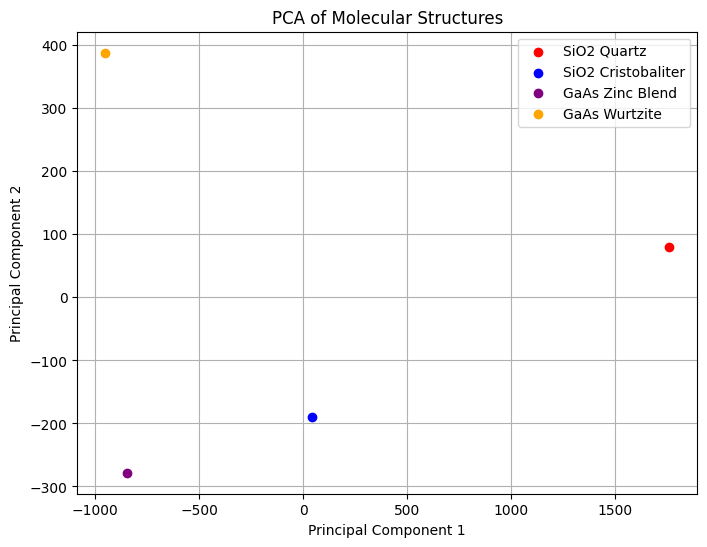

In [70]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Stack the SOAP descriptors into a single matrix
descriptors = np.array([
    vec_si_o2_quartz,
    vec_si_o2_cristobaliter,
    vec_ga_as_zinc_blend,
    vec_ga_as_wurtzite
])

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(descriptors)

# Colors for each structure
colors = ['red',  'blue', 'purple', 'orange']

# Labels for each structure
labels = ['SiO2 Quartz',  'SiO2 Cristobaliter', 'GaAs Zinc Blend', 'GaAs Wurtzite']

# Plotting the results
plt.figure(figsize=(8, 6))

# Scatter plot with different colors for each data point
for i, color in enumerate(colors):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], color=color)

# Adding legend in the upper right corner
plt.legend(labels, loc='upper right')

# Plot settings
plt.title("PCA of Molecular Structures")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Show the plot
plt.show()
